In [1]:
# Volatility Scenarios : 
# Example 
# The scenario - Financial Crisis of 2008
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from arch.univariate import GARCH, ConstantMean, Normal

%matplotlib inline
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

In [2]:

import arch.data.nasdaq

data = arch.data.nasdaq.load()
nasdaq = data['Adj Close']
print(nasdaq.head())

Date
1999-01-04    2208.050049
1999-01-05    2251.270020
1999-01-06    2320.860107
1999-01-07    2326.090088
1999-01-08    2344.409912
Name: Adj Close, dtype: float64


In [3]:

rets = 100 * nasdaq.pct_change().dropna()

# Build components to set the state for the distribution
random_state = np.random.RandomState(1)
dist = Normal(random_state=random_state)
volatility = GARCH(1, 1, 1)

mod = ConstantMean(rets, volatility=volatility, distribution=dist)

In [4]:
res = mod.fit(disp='off')
res

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -8196.75
Distribution:                  Normal   AIC:                           16403.5
Method:            Maximum Likelihood   BIC:                           16436.1
                                        No. Observations:                 5030
Date:                Mon, Jun 08 2020   Df Residuals:                     5025
Time:                        09:50:32   Df Model:                            5
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0376  1.476e-02      2.549  1.081e-02 [8.

In [5]:

forecasts = res.forecast(start='1-1-2017', horizon=10)
print(forecasts.residual_variance.dropna().head())

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2017-01-03  0.623295  0.637504  0.651549  0.665431  0.679154  0.692717   
2017-01-04  0.599455  0.613940  0.628257  0.642408  0.656397  0.670223   
2017-01-05  0.567297  0.582153  0.596837  0.611352  0.625699  0.639880   
2017-01-06  0.542506  0.557649  0.572616  0.587410  0.602034  0.616488   
2017-01-09  0.515452  0.530906  0.546183  0.561282  0.576208  0.590961   

                h.07      h.08      h.09      h.10  
Date                                                
2017-01-03  0.706124  0.719376  0.732475  0.745423  
2017-01-04  0.683890  0.697399  0.710752  0.723950  
2017-01-05  0.653897  0.667753  0.681448  0.694985  
2017-01-06  0.630776  0.644899  0.658858  0.672656  
2017-01-09  0.605543  0.619957  0.634205  0.648288  


In [6]:
sim_forecasts = res.forecast(start='1-1-2017', method='simulation', horizon=10)
print(sim_forecasts.residual_variance.dropna().head())

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2017-01-03  0.623295  0.637251  0.647817  0.663746  0.673404  0.687952   
2017-01-04  0.599455  0.617539  0.635838  0.649695  0.659733  0.667267   
2017-01-05  0.567297  0.583415  0.597571  0.613065  0.621790  0.636180   
2017-01-06  0.542506  0.555688  0.570280  0.585426  0.595551  0.608487   
2017-01-09  0.515452  0.528771  0.542658  0.559684  0.580434  0.594855   

                h.07      h.08      h.09      h.10  
Date                                                
2017-01-03  0.697221  0.707707  0.717701  0.729465  
2017-01-04  0.686503  0.699708  0.707203  0.718560  
2017-01-05  0.650287  0.663344  0.679835  0.692300  
2017-01-06  0.619195  0.638180  0.653185  0.661366  
2017-01-09  0.605136  0.621835  0.634091  0.653222  


In [7]:
# Custom Random Generators
import numpy as np
random_state = np.random.RandomState(1)


def scenario_rng(size):
    shocks = random_state.standard_normal(size)
    shocks[:, :5] *= np.sqrt(2)
    return shocks


scenario_forecasts = res.forecast(
    start='1-1-2017', method='simulation', horizon=10, rng=scenario_rng)
print(scenario_forecasts.residual_variance.dropna().head())

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2017-01-03  0.623295  0.685911  0.745202  0.821112  0.886289  0.966737   
2017-01-04  0.599455  0.668181  0.743119  0.811486  0.877539  0.936587   
2017-01-05  0.567297  0.629195  0.691225  0.758891  0.816663  0.893986   
2017-01-06  0.542506  0.596301  0.656603  0.721505  0.778286  0.849680   
2017-01-09  0.515452  0.567086  0.622224  0.689831  0.775048  0.845656   

                h.07      h.08      h.09      h.10  
Date                                                
2017-01-03  0.970796  0.977504  0.982202  0.992547  
2017-01-04  0.955295  0.965540  0.966432  0.974248  
2017-01-05  0.905952  0.915208  0.930777  0.938636  
2017-01-06  0.856175  0.873865  0.886221  0.890002  
2017-01-09  0.851104  0.864591  0.874696  0.894397  


In [12]:
import datetime as dt
import sys

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from arch import arch_model

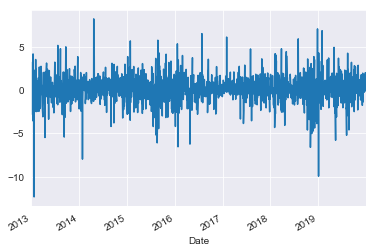

In [14]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2020,1,1)
appl_stock = web.get_data_yahoo('AAPL', start=start, end=end)
returns = 100 * appl_stock['Close'].pct_change().dropna()
returns.plot()
plt.show()
#appl_stock["Adj Close"].plot()
#plt.xlabel("Date")
#plt.ylabel("Adjusted Price")
#plt.title("Apple price data")
#plt.show()

In [20]:
model=arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3229.8710798863785
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3228.4947599144384
Iteration:      3,   Func. Count:     23,   Neg. LLF: 3228.1966235429168
Iteration:      4,   Func. Count:     32,   Neg. LLF: 3228.128402363808
Iteration:      5,   Func. Count:     39,   Neg. LLF: 3227.6339510477965
Iteration:      6,   Func. Count:     47,   Neg. LLF: 3227.581243290758
Iteration:      7,   Func. Count:     54,   Neg. LLF: 3227.333805956935
Iteration:      8,   Func. Count:     60,   Neg. LLF: 3227.3314351278555
Iteration:      9,   Func. Count:     66,   Neg. LLF: 3227.3313656949576
Iteration:     10,   Func. Count:     72,   Neg. LLF: 3227.3313643747924
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3227.3313643742877
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results      

In [21]:
#model_garch21=arch_model(returns, vol='Garch', p=2, o=0, q=1, dist='Normal')
#results=model_garch21.fit()
#print(results.summary())

In [22]:
#model_graph22=arch_model(returns, vol='Garch', p=2, o=0, q=2, dist='Normal')
#results_graph22=model_graph22.fit()
#print(results_graph22.summary())

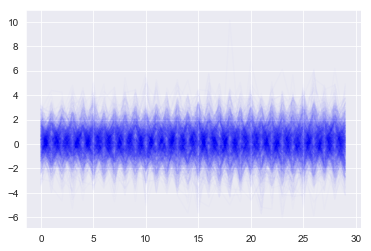

In [23]:
forecasts = results.forecast(horizon=30, method='simulation', simulations=1000)
sims = forecasts.simulations

lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')
plt.show()


-2.321907154889457


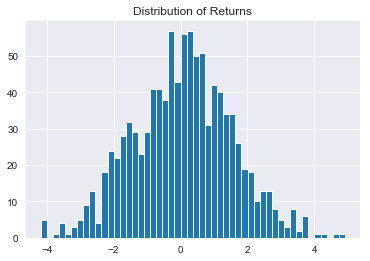

In [26]:
print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


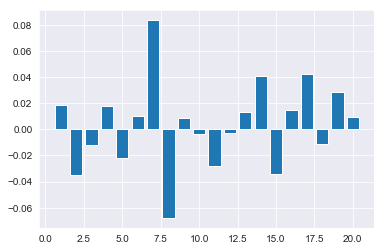

In [27]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

q1 = sm.tsa.stattools.acf(returns, nlags=20)        # autocorrelation for lags 1:20
plt.bar(x = np.arange(1,len(q1)), height = q1[1:])
plt.show()
plt.close()

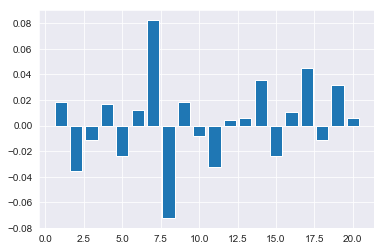

In [28]:
q2 = sm.tsa.stattools.pacf(returns, nlags=20)       # partial autocorr for lags 1:20
plt.bar(x = np.arange(1,len(q2)), height = q2[1:])
plt.show()
plt.close()